<a href="https://colab.research.google.com/github/arjunjanamatti/loan_defector/blob/master/loan_defection_EDA_and_imbalance_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### EDA

In [2]:
applicant_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ml_classification/applicant.csv')
print('Shape of applicant.csv: ', applicant_df.shape)
applicant_df.head()

Shape of applicant.csv:  (1000, 15)


,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0


In [3]:
loan_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ml_classification/loan.csv')
print('Shape of loan.csv: ', loan_df.shape)
loan_df.head()

Shape of loan.csv:  (1000, 13)


,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


In [4]:
combined_df = applicant_df.merge(loan_df, on = 'applicant_id')
print('Shape of the dataframe: ', combined_df.shape)
combined_df.head()

Shape of the dataframe:  (1000, 27)


,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket),loan_application_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0,d68d975e-edad-11ea-8761-1d6f9c1ff461,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac,d68d989e-edad-11ea-b1d5-2bcf65006448,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN,d68d995c-edad-11ea-814a-1b6716782575,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0,d68d99fc-edad-11ea-8841-17e8848060ae,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0,d68d9a92-edad-11ea-9f3d-1f8682db006a,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


* As observed from the combined dataset of applicant and loan csv, only the columns with string type have missing data

In [5]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

* Number of null values in a column, if it has any null values
* format of the result is
  * (column_name, number of null values in column_name)

In [6]:
missing_value_count = combined_df.isna().sum()
column_names = list(combined_df.columns)
[(column_names[index], value) for index, value in enumerate(missing_value_count) if value>0]

[('Has_been_employed_for_at_least', 62),
 ('Has_been_employed_for_at_most', 253),
 ('Telephone', 596),
 ('Savings_account_balance', 183),
 ('Balance_in_existing_bank_account_(lower_limit_of_bucket)', 668),
 ('Balance_in_existing_bank_account_(upper_limit_of_bucket)', 457),
 ('Purpose', 12),
 ('Property', 154),
 ('Other_EMI_plans', 814)]

* Percentage of missing values in each column, when compared to total values

In [7]:
[(column_names[index], round(((value/len(combined_df))*100),2)) 
for index, value in enumerate(missing_value_count) if value>0]

[('Has_been_employed_for_at_least', 6.2),
 ('Has_been_employed_for_at_most', 25.3),
 ('Telephone', 59.6),
 ('Savings_account_balance', 18.3),
 ('Balance_in_existing_bank_account_(lower_limit_of_bucket)', 66.8),
 ('Balance_in_existing_bank_account_(upper_limit_of_bucket)', 45.7),
 ('Purpose', 1.2),
 ('Property', 15.4),
 ('Other_EMI_plans', 81.4)]

#### Inference from Data

* Mean age of the applicant is 35.55, and median age of the applicant age is 33
* Number of dependents is around 1 for both mean and median
* Average duration of loan taken is around 21 months, and median for loan duration taken is 18 months.
* Average principal amount of loan is [3,271,258], whereas the median principal amount is [2,319,500], since there is difference in median and mean, with mean higher than median, there are few loans with very high amount which are pushing the average higher than almost 1 million higher than the median value.


In [8]:
combined_df.iloc[:,1:].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Primary_applicant_age_in_years,1000.0,35.546,1.137547e+01,19.0,27.0,33.0,42.0,75.0
Number_of_dependents,1000.0,1.155,3.620858e-01,1.0,1.0,1.0,1.0,2.0
Years_at_current_residence,1000.0,2.845,1.103718e+00,1.0,2.0,3.0,4.0,4.0
Foreign_worker,1000.0,0.963,1.888562e-01,0.0,1.0,1.0,1.0,1.0
Months_loan_taken_for,1000.0,20.903,1.205881e+01,4.0,12.0,18.0,24.0,72.0
Principal_loan_amount,1000.0,3271258.000,2.822737e+06,250000.0,1365500.0,2319500.0,3972250.0,18424000.0
EMI_rate_in_percentage_of_disposable_income,1000.0,2.973,1.118715e+00,1.0,2.0,3.0,4.0,4.0
Has_coapplicant,1000.0,0.041,1.983894e-01,0.0,0.0,0.0,0.0,1.0
Has_guarantor,1000.0,0.052,2.221381e-01,0.0,0.0,0.0,0.0,1.0
Number_of_existing_loans_at_this_bank,1000.0,1.407,5.776545e-01,1.0,1.0,1.0,2.0,4.0


* There is class imbalance observed in the classification label dataset, there are 700 low risk applicants, compared to 300 high risk applicants.

##### Are young people more creditworthy?
  * Just by looking at the age of the customer, it is difficult to understand the credit worthiness, since there are more number of young people in less credit risk than more credit risk
  * There are 263 applicants below 30 with low risk and 148 applicants below 30 with high risk, hence just by age, it is difficult to identify the risk category.
  * However in our dataset, we have 700 low risk applicants and 300 high risk applicants, almost 50% of high risk applicants are below the age of 30, whereas only 37.5 % of low risk applicants are below age of 30. 
  * This dataset has 406 applicants below age of 30, out of which around 35% of the applicants are high risk. Of remaining 594 applicants who are above the age of 30, there are around 26% of applicants are high risk applicants.
  * Around 71% of the low risk applicants are below the age of 40, and 76% of high risk applicants are below age of 40.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa382735860>,
      dtype=object)

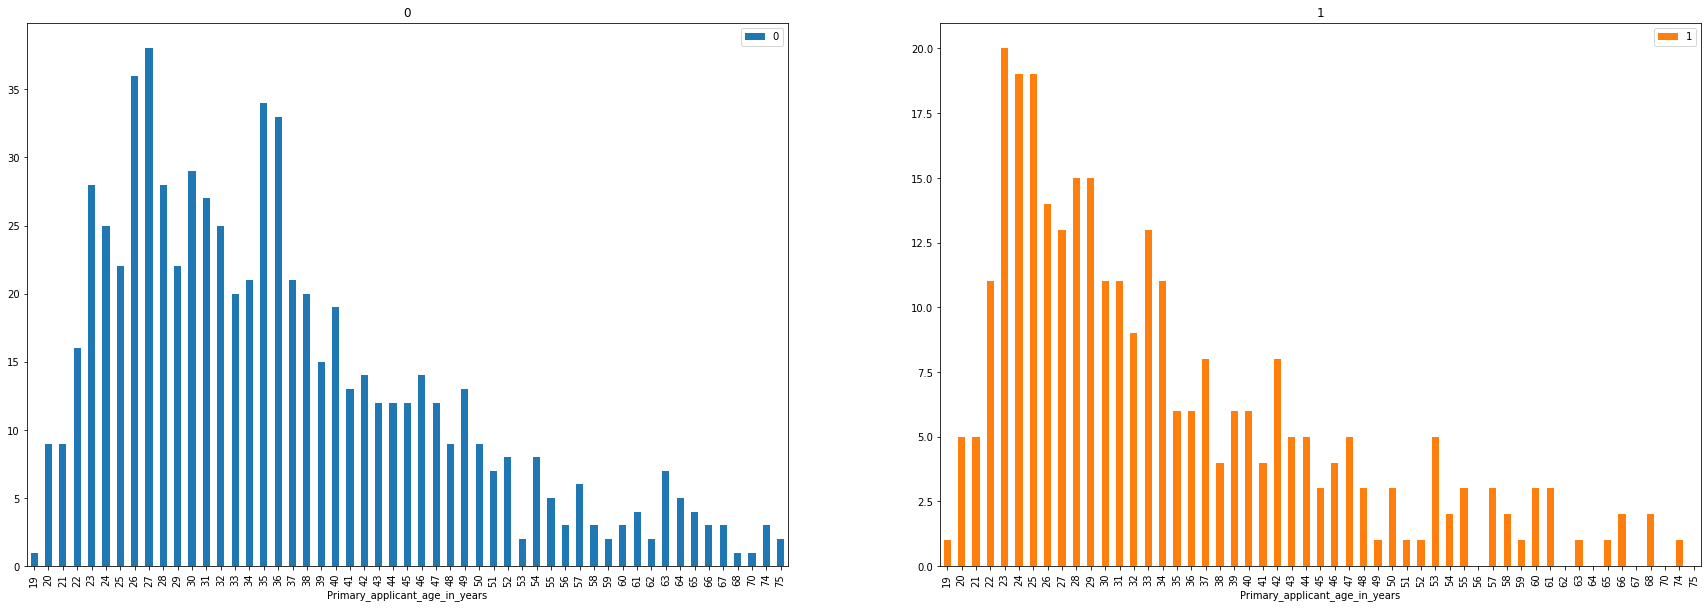

In [9]:
df_try = (combined_df.groupby(['high_risk_applicant','Primary_applicant_age_in_years']).agg(count_hig_risk_applicants = ('high_risk_applicant', len)))
df_try.count_hig_risk_applicants.unstack(0).fillna(0).plot(kind='bar',subplots=True, layout=(1,2), figsize = (30,10))


In [10]:
df_below_30 = (df_try[df_try.index.isin(list(range(31)), level=1)])
print('Number of low risk applicants below 30: ', (df_below_30[df_below_30.index.isin(list(range(1)), level=0)]).sum())
print('Number of high risk applicants below 30: ', (df_below_30[df_below_30.index.isin(list(range(1,2)), level=0)]).sum())

Number of low risk applicants below 30:  count_hig_risk_applicants    263
dtype: int64
Number of high risk applicants below 30:  count_hig_risk_applicants    148
dtype: int64


In [11]:
df_between_30_40 = (df_try[df_try.index.isin(list(range(31,41)), level=1)])
print('Number of low risk applicants between 30 and 40: ', (df_between_30_40[df_between_30_40.index.isin(list(range(1)), level=0)]).sum())
print('Number of high risk applicants between 30 and 40: ', (df_between_30_40[df_between_30_40.index.isin(list(range(1,2)), level=0)]).sum())

Number of low risk applicants between 30 and 40:  count_hig_risk_applicants    235
dtype: int64
Number of high risk applicants between 30 and 40:  count_hig_risk_applicants    80
dtype: int64


In [12]:
df_below_40 = (df_try[df_try.index.isin(list(range(41)), level=1)])
print('Number of low risk applicants below 40: ', (df_below_40[df_below_40.index.isin(list(range(1)), level=0)]).sum())
print('Number of high risk applicants below 40: ', (df_below_40[df_below_40.index.isin(list(range(1,2)), level=0)]).sum())

Number of low risk applicants below 40:  count_hig_risk_applicants    498
dtype: int64
Number of high risk applicants below 40:  count_hig_risk_applicants    228
dtype: int64


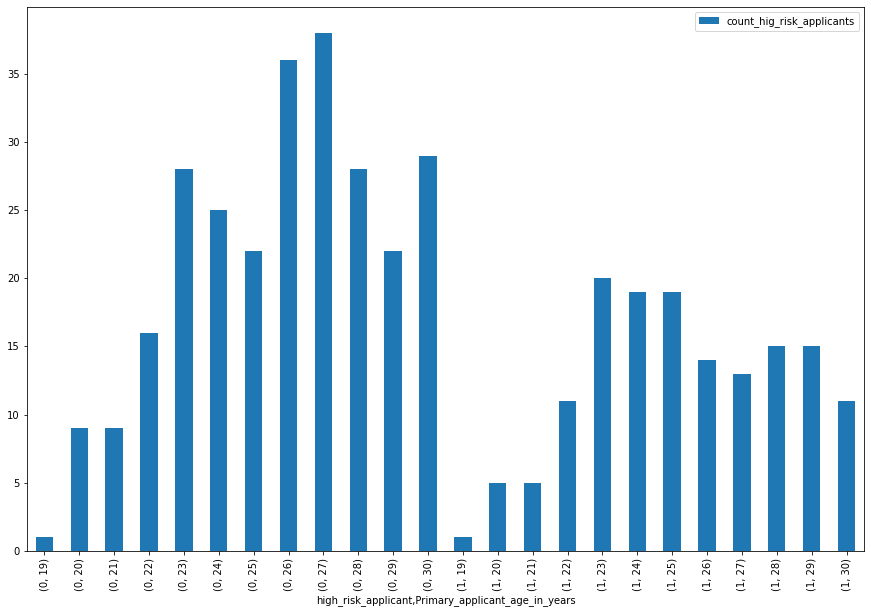

In [13]:
df_try = (combined_df.groupby(['high_risk_applicant','Primary_applicant_age_in_years']).agg(count_hig_risk_applicants = ('high_risk_applicant', len)))
(df_try[df_try.index.isin(list(range(31)), level=1)]).plot.bar(figsize = (15,10))

In [14]:
df_try = (combined_df.groupby(['high_risk_applicant','Principal_loan_amount']).agg(count_hig_risk_applicants = ('high_risk_applicant', len)))
df_try

count_hig_risk_applicants
high_risk_applicant Principal_loan_amount                           
0                   250000                                         1
                    276000                                         1
                    338000                                         1
                    339000                                         1
                    343000                                         1
...                                                              ...
1                   14782000                                       1
                    14896000                                       1
                    15672000                                       1
                    15945000                                       1
                    18424000                                       1

[949 rows x 1 columns]

##### Would a person with critical credit history be more creditworthy?

  * Based on just past credit history, it is quite difficult to predict an applicant if he/she is high risk or low risk, since number of applicants with 'delay in paying off loans in the past' are a less percentage of the overall high risk category.
  * The highest category in both low risk and high risk applicants is the category of 'existing loans paid back till now', since this is the case, the credit worhtiness feature on a single note may not be highly correlated.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa381f14e10>,
      dtype=object)

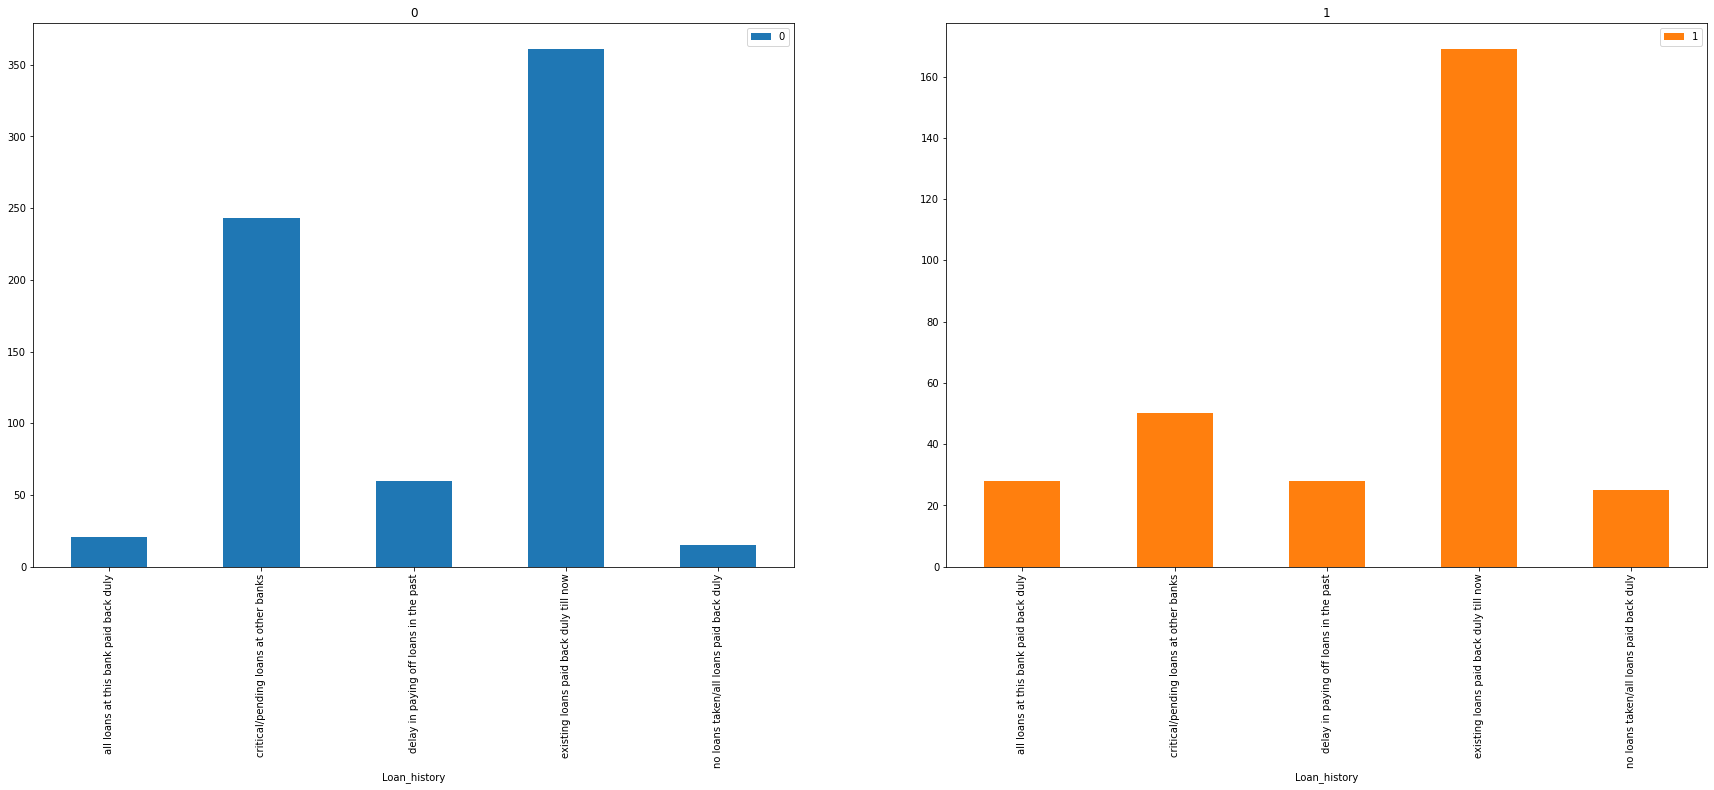

In [15]:
df_try_loan_history = (combined_df.groupby(['high_risk_applicant','Loan_history']).agg(count_hig_risk_applicants = ('Loan_history', len)))
df_try_loan_history.count_hig_risk_applicants.unstack(0).fillna(0).plot(kind='bar',subplots=True, layout=(1,2), figsize = (30,10))

##### Would a person with more credit accounts be more creditworthy?
* As per the visuals below people with just one credit account are less trustworthy, but this may also be observed due the imbalance in the high risk and low risk categories

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa381ecf860>,
      dtype=object)

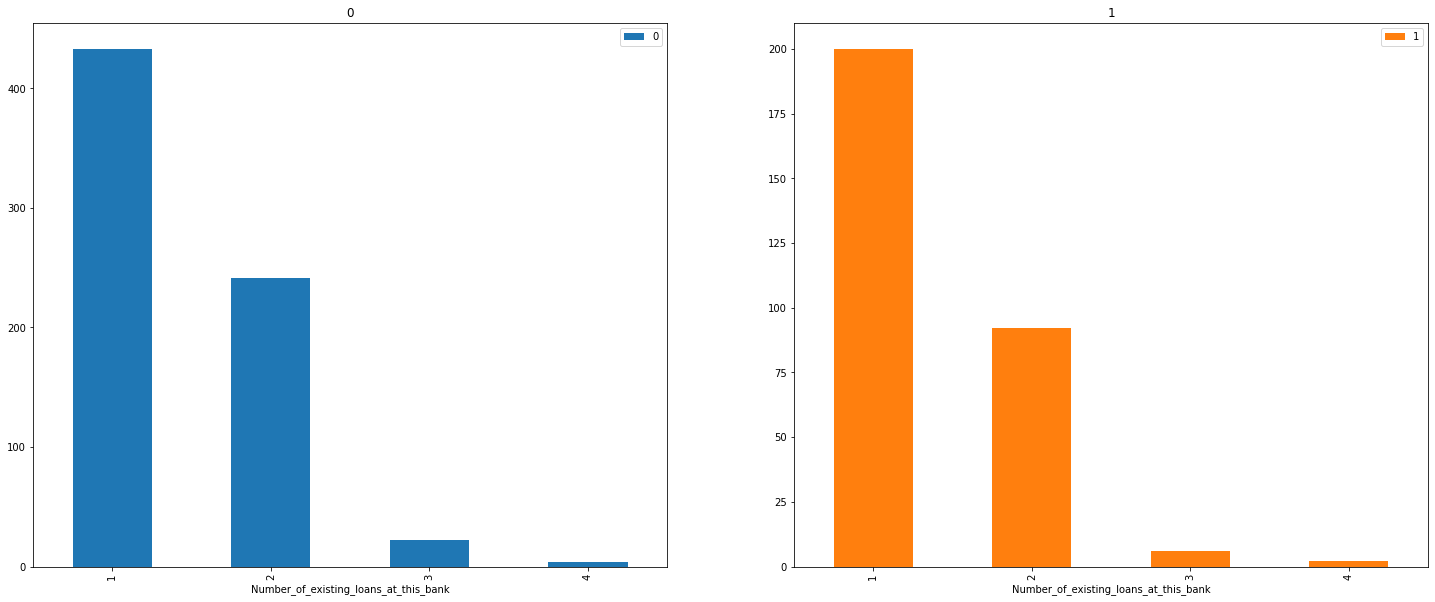

In [16]:
df_try = (combined_df.groupby(['high_risk_applicant','Number_of_existing_loans_at_this_bank']).agg(count_hig_risk_applicants = ('high_risk_applicant', len)))
df_try.count_hig_risk_applicants.unstack(0).fillna(0).plot(kind='bar',subplots=True, layout=(1,2), figsize = (25,10))


### Correlation of Features towards risk category

In [17]:
object_column_names = (combined_df.loc[:, combined_df.dtypes == np.object]).columns
numeric_column_names = (combined_df.loc[:, combined_df.dtypes == np.int64]).columns

In [18]:
combined_df[numeric_column_names[1:]].corrwith(combined_df['high_risk_applicant'])

Primary_applicant_age_in_years                -0.091127
Number_of_dependents                          -0.003015
Years_at_current_residence                     0.002967
Foreign_worker                                 0.082079
Months_loan_taken_for                          0.214927
Principal_loan_amount                          0.154739
EMI_rate_in_percentage_of_disposable_income    0.072404
Has_coapplicant                                0.062728
Has_guarantor                                 -0.055039
Number_of_existing_loans_at_this_bank         -0.045732
high_risk_applicant                            1.000000
dtype: float64

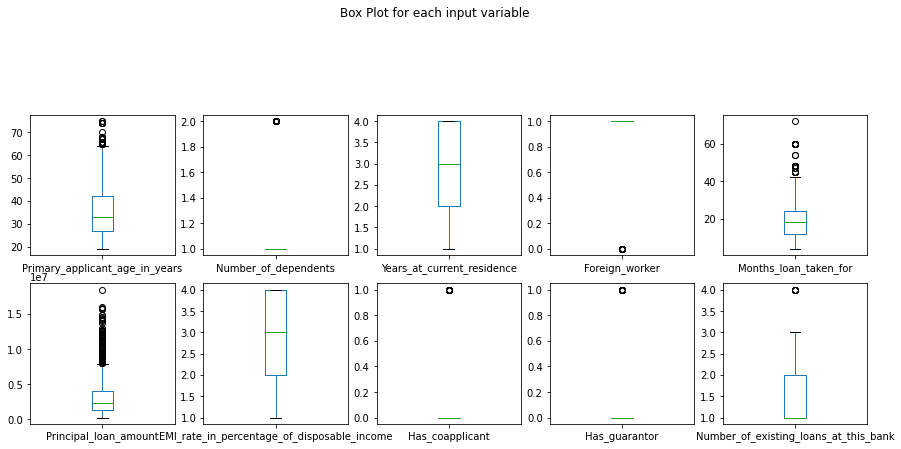

In [19]:
combined_df.iloc[:,1:].drop('high_risk_applicant', axis=1).plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(15,15), 
                                        title='Box Plot for each input variable')
plt.show()

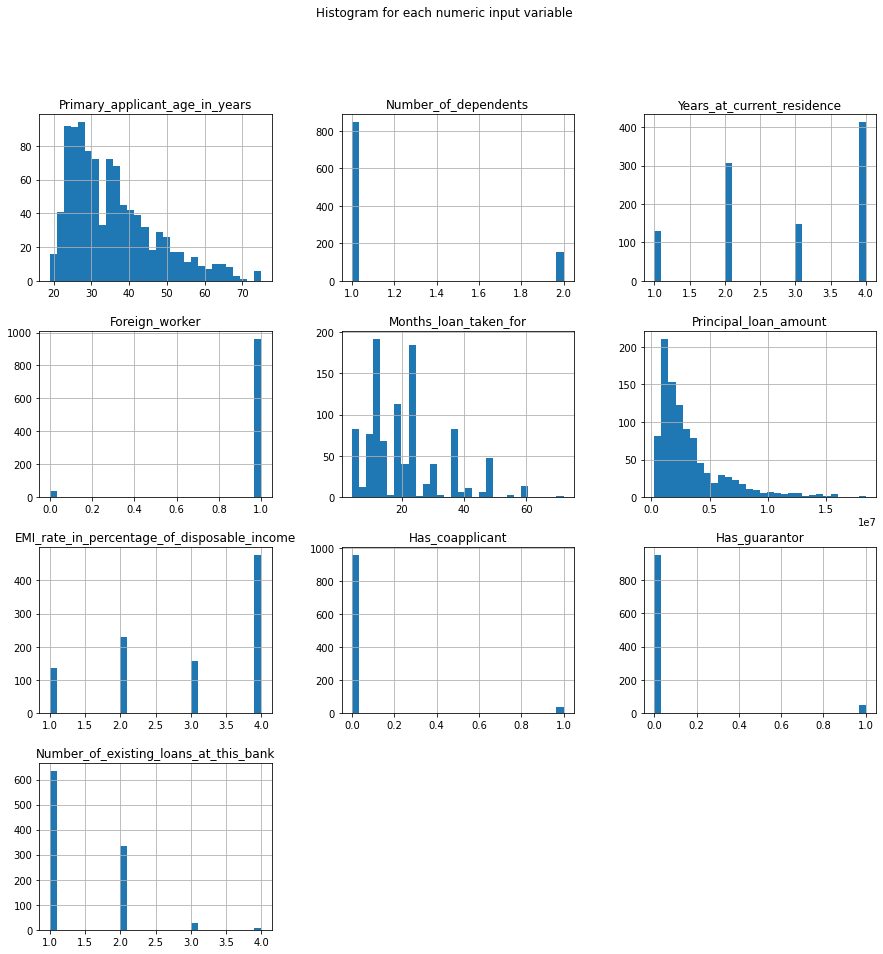

In [20]:
import pylab as pl
combined_df.iloc[:,1:].drop('high_risk_applicant' ,axis=1).hist(bins=30, figsize=(15,15))
pl.suptitle("Histogram for each numeric input variable")
plt.show()

* Correlation chart

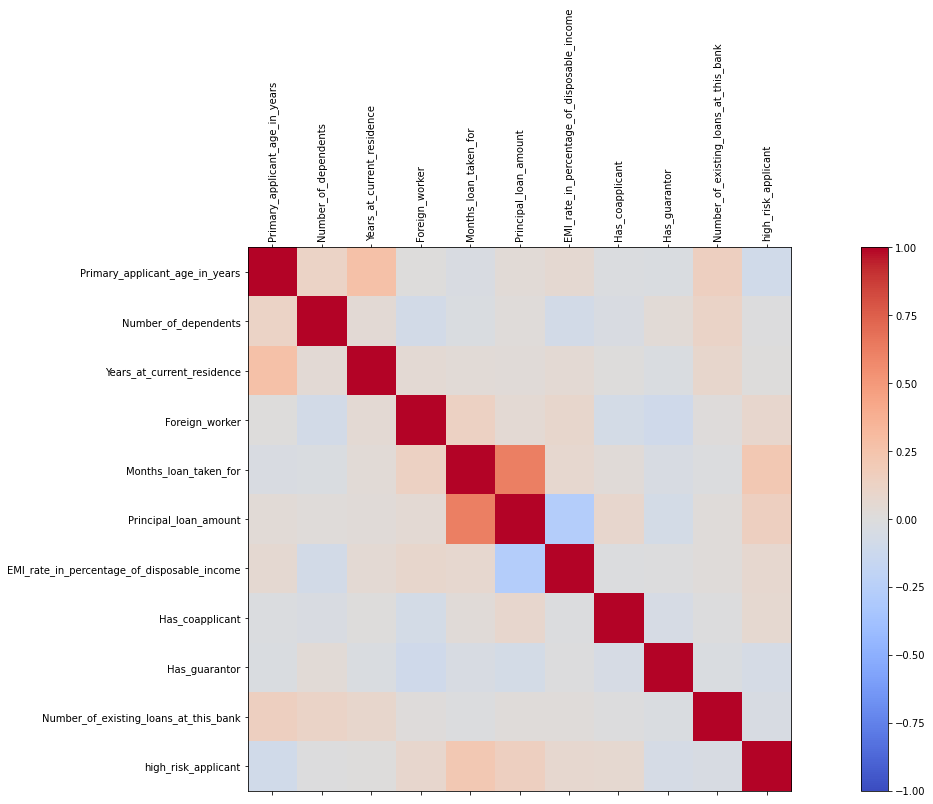

In [21]:
updated_data_1 = combined_df.iloc[:,1:].drop(columns = object_column_names)
corr = updated_data_1.corr()

fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(updated_data_1.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(updated_data_1.columns)
ax.set_yticklabels(updated_data_1.columns)
plt.show()

* Heatmap

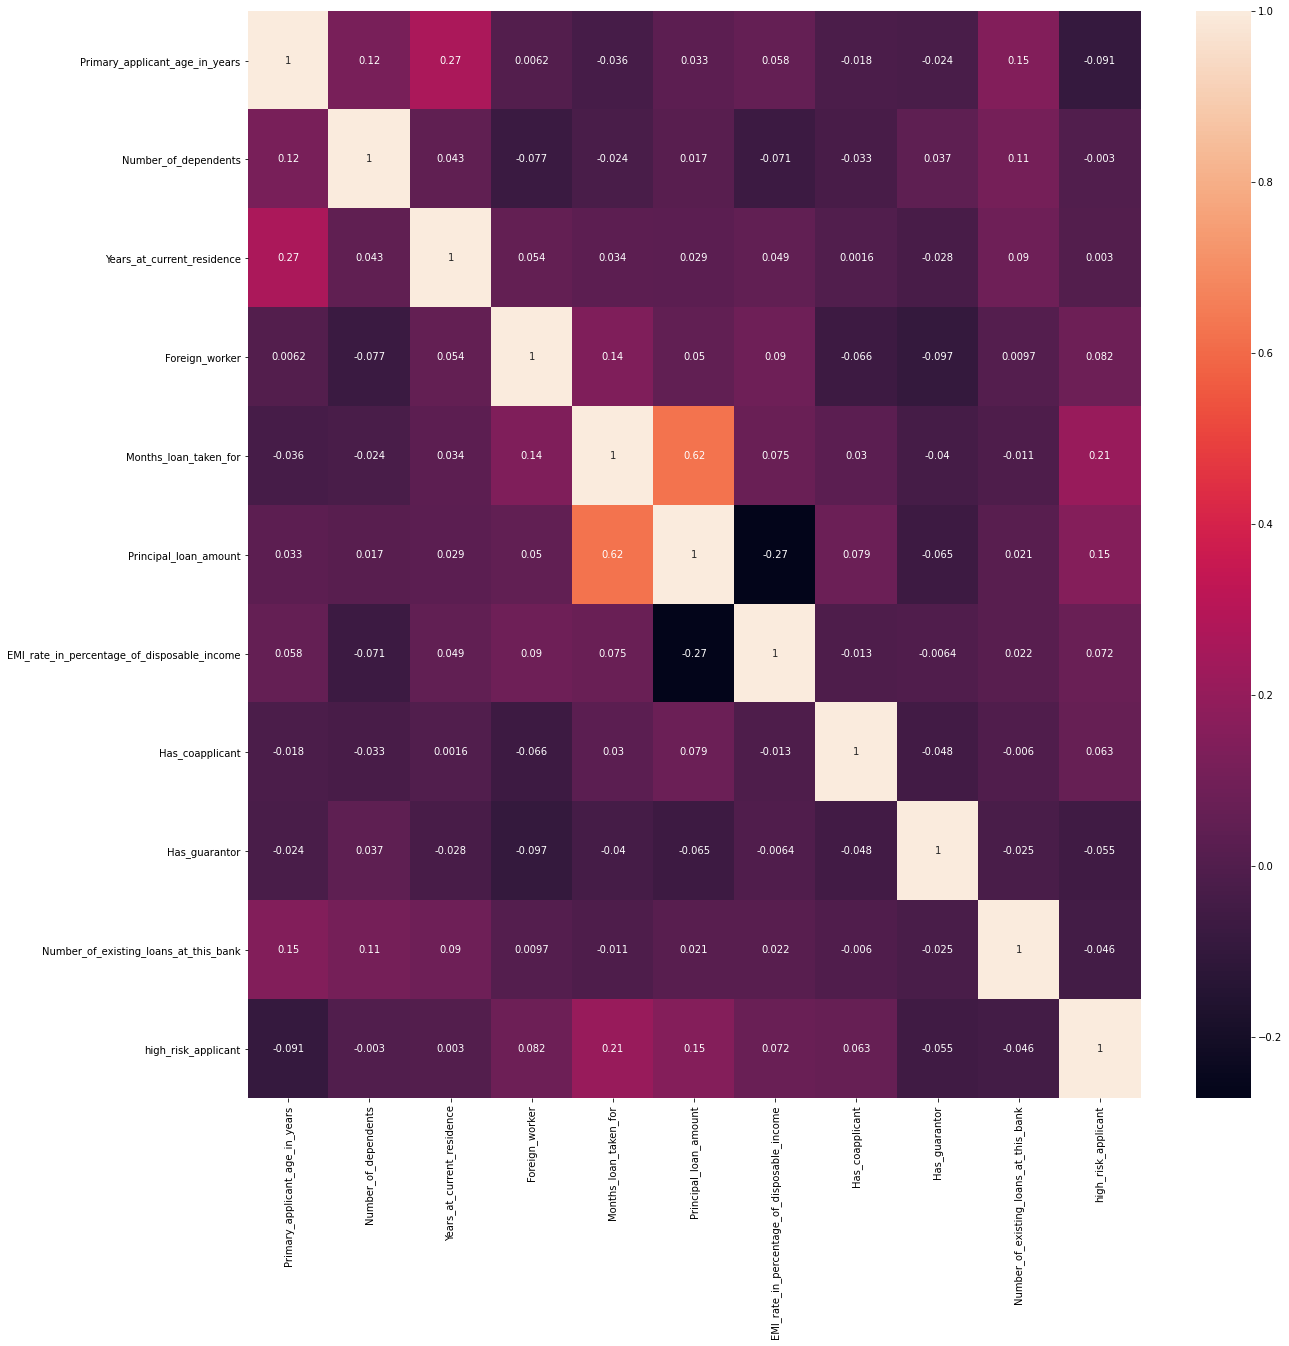

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(combined_df.iloc[:,1:].corr(), annot=True)
plt.show()

### Handling missing values

In [23]:
missing_value_count = combined_df.isna().sum()
column_names = list(combined_df.columns)
missing_null_columns = []
[(missing_null_columns.append(column_names[index]),column_names[index], value) for index, value in enumerate(missing_value_count) if value>0]

[(None, 'Has_been_employed_for_at_least', 62),
 (None, 'Has_been_employed_for_at_most', 253),
 (None, 'Telephone', 596),
 (None, 'Savings_account_balance', 183),
 (None, 'Balance_in_existing_bank_account_(lower_limit_of_bucket)', 668),
 (None, 'Balance_in_existing_bank_account_(upper_limit_of_bucket)', 457),
 (None, 'Purpose', 12),
 (None, 'Property', 154),
 (None, 'Other_EMI_plans', 814)]

In [24]:
[(column_names[index], round(((value/len(combined_df))*100),2)) 
for index, value in enumerate(missing_value_count) if value>0]

[('Has_been_employed_for_at_least', 6.2),
 ('Has_been_employed_for_at_most', 25.3),
 ('Telephone', 59.6),
 ('Savings_account_balance', 18.3),
 ('Balance_in_existing_bank_account_(lower_limit_of_bucket)', 66.8),
 ('Balance_in_existing_bank_account_(upper_limit_of_bucket)', 45.7),
 ('Purpose', 1.2),
 ('Property', 15.4),
 ('Other_EMI_plans', 81.4)]

* For columns with less than 20% of the rows, we will fill with the mode.
* For 'Other_EMI_plans', it has more than 800 rows missing out of 1000 rows.
  * Also checked for the pattern if the 200 rows are only for high risk or low risk applicants, which was not the case, hence this column will be deleted.
* For 'Telephone', it has more than 600 rows approximately missing and there is no pattern that Telephone was available for high risk or low risk applicant, hence this column will also be dropped.
* The columns 'Has_been_employed_for_at_least' and 'Has_been_employed_for_at_most' are mutually exclusive, hence will take the average of those two columns in a new column
* 'Property', 'Purpose' have very less null values, hence they will be filled up with the mode or most frequently occuring value.
* 'Balance_in_existing_bank_account_lower_limit' and 'Balance_in_existing_bank_account_upper_limit' are not mutually exclusive, hence have decided to delete these columns, since number of rows where both the columns are null is also around 400 rows, and the amount is either 0 or 2 lacs, hence this column may not contribute much to the high risk category.

* Creation of average employment years for the applicant

In [25]:
employed_at_least = combined_df['Has_been_employed_for_at_least'].str.extract('(\d+)')
employed_at_most = combined_df['Has_been_employed_for_at_most'].str.extract('(\d+)')
employed_at_least.fillna(value = 0, inplace = True)
employed_at_most.fillna(value = 0, inplace = True)
employed_at_least = pd.to_numeric(employed_at_least.iloc[:,0])
employed_at_most = pd.to_numeric(employed_at_most.iloc[:,0])
employed_df = pd.concat([employed_at_least, employed_at_most], axis = 1)
employed_df['average'] = 0.5 * (employed_df.iloc[:,0] + employed_df.iloc[:,1])
combined_df['Average_employment_years'] = employed_df['average']

* Dropping of 'Other_EMI_plans', 'Telephone', 'Balance_in_existing_bank_account_(lower_limit_of_bucket)' and 'Balance_in_existing_bank_account_(upper_limit_of_bucket)'

In [26]:
combined_df = combined_df.drop(labels = ['Other_EMI_plans', 
                                         'Telephone',
                                         'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
                                         'Balance_in_existing_bank_account_(upper_limit_of_bucket)',
                                         'Has_been_employed_for_at_least',
                                         'Has_been_employed_for_at_most',
                                         'loan_application_id'],
                                       axis = 1)
combined_df.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Foreign_worker,Savings_account_balance,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant,Average_employment_years
0,1469590,67,male,single,1,own,4,skilled employee / official,1,NaN,6,electronic equipment,1169000,4,real estate,0,0,2,critical/pending loans at other banks,0,3.5
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1,Low,48,electronic equipment,5951000,2,real estate,0,0,1,existing loans paid back duly till now,1,2.5
2,1432761,49,male,single,2,own,3,unskilled - resident,1,Low,12,education,2096000,2,real estate,0,0,1,critical/pending loans at other banks,0,5.5
3,1207582,45,male,single,2,for free,4,skilled employee / official,1,Low,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,1,existing loans paid back duly till now,0,5.5
4,1674436,53,male,single,2,for free,4,skilled employee / official,1,Low,24,new vehicle,4870000,3,NaN,0,0,2,delay in paying off loans in the past,1,2.5


In [27]:
# missing_null_df = combined_df[missing_null_columns]
# print()
# missing_null_df.head()

In [28]:
# bank_balance = combined_df.dropna(subset = ['Balance_in_existing_bank_account_(lower_limit_of_bucket)',
#                                  'Balance_in_existing_bank_account_(upper_limit_of_bucket)'],
#                        how = 'all')

# (bank_balance.groupby(['high_risk_applicant','Balance_in_existing_bank_account_(upper_limit_of_bucket)']).agg(count_hig_risk_applicants = ('high_risk_applicant', len)))

In [29]:
# bank_balance = combined_df.dropna(subset = ['Telephone'],
#                        how = 'all')

# (bank_balance.groupby(['high_risk_applicant','Telephone']).agg(count_hig_risk_applicants = ('high_risk_applicant', len)))

In [30]:
# bank_balance = combined_df.dropna(subset = ['Other_EMI_plans'],
#                        how = 'all')

# (bank_balance.groupby(['high_risk_applicant','Other_EMI_plans']).agg(count_hig_risk_applicants = ('high_risk_applicant', len)))

In [31]:
# missing_null_df['Savings_account_balance'].unique()

In [32]:
# (combined_df.dropna(subset = ['Balance_in_existing_bank_account_(lower_limit_of_bucket)',
#                                  'Balance_in_existing_bank_account_(upper_limit_of_bucket)'],
#                        how = 'all'))['high_risk_applicant'].sum()

In [33]:
missing_value_count = combined_df.isna().sum()
column_names = list(combined_df.columns)
missing_null_columns = []
[(missing_null_columns.append(column_names[index]),column_names[index], value) for index, value in enumerate(missing_value_count) if value>0]

[(None, 'Savings_account_balance', 183),
 (None, 'Purpose', 12),
 (None, 'Property', 154)]

In [34]:
listed_columns_mode_fill = list(combined_df.columns)
for i in range(len(listed_columns_mode_fill)):
    a = len(combined_df[listed_columns_mode_fill[i]].unique())
#     print("column: ", i, " number of unique elements are: ", a )
    if a <= 10:
        combined_df[listed_columns_mode_fill[i]].fillna(combined_df[listed_columns_mode_fill[i]].mode()[0], inplace=True)
combined_df

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Foreign_worker,Savings_account_balance,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant,Average_employment_years
0,1469590,67,male,single,1,own,4,skilled employee / official,1,Low,6,electronic equipment,1169000,4,real estate,0,0,2,critical/pending loans at other banks,0,3.5
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1,Low,48,electronic equipment,5951000,2,real estate,0,0,1,existing loans paid back duly till now,1,2.5
2,1432761,49,male,single,2,own,3,unskilled - resident,1,Low,12,education,2096000,2,real estate,0,0,1,critical/pending loans at other banks,0,5.5
3,1207582,45,male,single,2,for free,4,skilled employee / official,1,Low,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,1,existing loans paid back duly till now,0,5.5
4,1674436,53,male,single,2,for free,4,skilled employee / official,1,Low,24,new vehicle,4870000,3,car or other,0,0,2,delay in paying off loans in the past,1,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1880194,31,female,divorced/separated/married,1,own,4,unskilled - resident,1,Low,12,FF&E,1736000,3,real estate,0,0,1,existing loans paid back duly till now,0,5.5
996,1114064,40,male,divorced/separated,1,own,4,management / self-employed / highly qualified ...,1,Low,30,used vehicle,3857000,4,building society savings agreement/life insurance,0,0,1,existing loans paid back duly till now,0,2.5
997,1758046,38,male,single,1,own,4,skilled employee / official,1,Low,12,electronic equipment,804000,4,car or other,0,0,1,existing loans paid back duly till now,0,3.5
998,1824545,23,male,single,1,for free,4,skilled employee / official,1,Low,45,electronic equipment,1845000,4,car or other,0,0,1,existing loans paid back duly till now,1,2.5


In [35]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   applicant_id                                 1000 non-null   int64  
 1   Primary_applicant_age_in_years               1000 non-null   int64  
 2   Gender                                       1000 non-null   object 
 3   Marital_status                               1000 non-null   object 
 4   Number_of_dependents                         1000 non-null   int64  
 5   Housing                                      1000 non-null   object 
 6   Years_at_current_residence                   1000 non-null   int64  
 7   Employment_status                            1000 non-null   object 
 8   Foreign_worker                               1000 non-null   int64  
 9   Savings_account_balance                      1000 non-null   object 
 10  M

### Handling categorical columns

In [36]:
object_column_names = (combined_df.loc[:, combined_df.dtypes == np.object]).columns
combined_df[object_column_names].head()

,Gender,Marital_status,Housing,Employment_status,Savings_account_balance,Purpose,Property,Loan_history
0,male,single,own,skilled employee / official,Low,electronic equipment,real estate,critical/pending loans at other banks
1,female,divorced/separated/married,own,skilled employee / official,Low,electronic equipment,real estate,existing loans paid back duly till now
2,male,single,own,unskilled - resident,Low,education,real estate,critical/pending loans at other banks
3,male,single,for free,skilled employee / official,Low,FF&E,building society savings agreement/life insurance,existing loans paid back duly till now
4,male,single,for free,skilled employee / official,Low,new vehicle,car or other,delay in paying off loans in the past


In [37]:
for i in object_column_names:
  labelencoder = LabelEncoder()
  combined_df[i] = labelencoder.fit_transform(combined_df[i])
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   applicant_id                                 1000 non-null   int64  
 1   Primary_applicant_age_in_years               1000 non-null   int64  
 2   Gender                                       1000 non-null   int64  
 3   Marital_status                               1000 non-null   int64  
 4   Number_of_dependents                         1000 non-null   int64  
 5   Housing                                      1000 non-null   int64  
 6   Years_at_current_residence                   1000 non-null   int64  
 7   Employment_status                            1000 non-null   int64  
 8   Foreign_worker                               1000 non-null   int64  
 9   Savings_account_balance                      1000 non-null   int64  
 10  M

In [38]:
combined_df.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Foreign_worker,Savings_account_balance,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant,Average_employment_years
0,1469590,67,1,3,1,1,4,1,1,1,6,5,1169000,4,2,0,0,2,1,0,3.5
1,1203873,22,0,1,1,1,2,1,1,1,48,5,5951000,2,2,0,0,1,3,1,2.5
2,1432761,49,1,3,2,1,3,3,1,1,12,4,2096000,2,2,0,0,1,1,0,5.5
3,1207582,45,1,3,2,0,4,1,1,1,42,0,7882000,2,0,0,1,1,3,0,5.5
4,1674436,53,1,3,2,0,4,1,1,1,24,6,4870000,3,1,0,0,2,2,1,2.5


### Handling imbalanced classification labels

In [39]:
(combined_df.groupby('high_risk_applicant').size())

high_risk_applicant
0    700
1    300
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


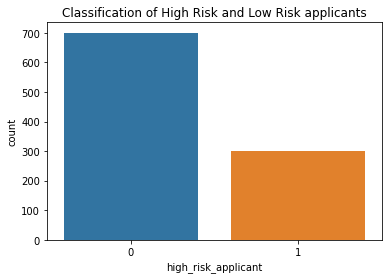

In [40]:
import seaborn as sns
sns.countplot(combined_df['high_risk_applicant'],label="Count")
plt.title('Classification of High Risk and Low Risk applicants')
plt.show()

In [41]:
# a = list(applicant_df['Housing'].unique())
# b = list(applicant_df['Housing'].value_counts())
# [(a[c],b[c]) for c in range(len(a))]

* Swapping the columns, such that the last column is the dependent variable

In [42]:
cols = list(combined_df.columns)
a, b = cols.index('high_risk_applicant'), cols.index('Average_employment_years')
cols[b], cols[a] = cols[a], cols[b]
combined_df = combined_df[cols]
combined_df.head()


,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Foreign_worker,Savings_account_balance,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,Average_employment_years,high_risk_applicant
0,1469590,67,1,3,1,1,4,1,1,1,6,5,1169000,4,2,0,0,2,1,3.5,0
1,1203873,22,0,1,1,1,2,1,1,1,48,5,5951000,2,2,0,0,1,3,2.5,1
2,1432761,49,1,3,2,1,3,3,1,1,12,4,2096000,2,2,0,0,1,1,5.5,0
3,1207582,45,1,3,2,0,4,1,1,1,42,0,7882000,2,0,0,1,1,3,5.5,0
4,1674436,53,1,3,2,0,4,1,1,1,24,6,4870000,3,1,0,0,2,2,2.5,1


In [43]:
# class count
class_count_0, class_count_1 = combined_df['high_risk_applicant'].value_counts()

# Separate class
class_0 = combined_df[combined_df['high_risk_applicant'] == 0]
class_1 = combined_df[combined_df['high_risk_applicant'] == 1]# print the shape of the class
print('high_risk_applicant 0:', class_0.shape)
print('high_risk_applicant 1:', class_1.shape)

high_risk_applicant 0: (700, 21)
high_risk_applicant 1: (300, 21)


#### Random Undersampling

total class of 1 and 0: 1    300
0    300
Name: high_risk_applicant, dtype: int64


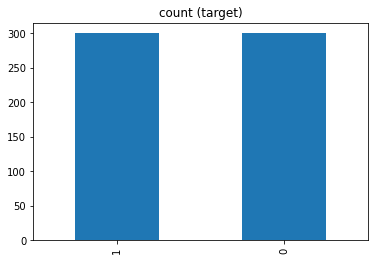

In [44]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)
print("total class of 1 and 0:",test_under['high_risk_applicant'].value_counts())# plot the count after under-sampeling
test_under['high_risk_applicant'].value_counts().plot(kind='bar', title='count (target)')

#### Random oversampling

total class of 1 and 0: 1    700
0    700
Name: high_risk_applicant, dtype: int64


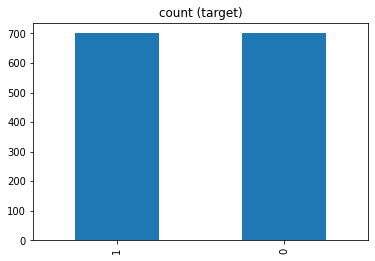

In [45]:
class_1_over = class_1.sample(class_count_0, replace = True)

test_over = pd.concat([class_1_over, class_0], axis=0)
print("total class of 1 and 0:",test_over['high_risk_applicant'].value_counts())
test_over['high_risk_applicant'].value_counts().plot(kind='bar', title='count (target)')

#### Handling imbalance with imblearn library

In [46]:
import imblearn
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from collections import Counter 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Tomek links are pairs of very close instances of high risk and low risk applicant, this will try to remove all the instances which are close to each other, hence the remaining data will be further apart, and this will be helpful in the classification process.

In [47]:
tome_links = TomekLinks(sampling_strategy = 'majority')

X = combined_df.iloc[:,1:-1]
y = combined_df.iloc[:,-1]

x_tome_links, y_tome_links = tome_links.fit_resample(X, y)

# tome_links = SMOTE()

# X = combined_df.iloc[:,:-1]
# y = combined_df.iloc[:,-1]

# x_tome_links, y_tome_links = tome_links.fit_resample(X, y)
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_tome_links))

Original dataset shape Counter({0: 700, 1: 300})
Resample dataset shape Counter({0: 570, 1: 300})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


##### Synthetic Minority Oversampling Technique (SMOTE)

SMOTE algorithm works in 4 simple steps:

* It selects the minority class, which is high risk applicant in our case
* It finds its k nearest neighbors, and places a synthetic point on the line jointing the point under consideration and its chose neighbor.
* This process is repeated till the high risk applicant class is equal to low risk applicant.


In [48]:
smote = SMOTE()

x_smote, y_smote = smote.fit_resample(X, y)
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 700, 1: 300})
Resample dataset shape Counter({0: 700, 1: 700})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


NearMiss is a technique which focusses on reducing the majority class, which is low risk applicant in our case, and the end result will have low risk applicants equal to high risk applicants

In [49]:
near_miss = NearMiss()
X = combined_df.iloc[:,1:-1]
y = combined_df.iloc[:,-1]
x_near_miss, y_near_miss = near_miss.fit_resample(X, y)
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_near_miss))

Original dataset shape Counter({0: 700, 1: 300})
Resample dataset shape Counter({0: 300, 1: 300})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### Machine Learning Algorithms

#### Baseline Algorithm [ ZeroR]

In [50]:
from sklearn.dummy import DummyClassifier
zeroR_training = []
zeroR_testing = []
X_train, X_test, y_train, y_test = train_test_split(x_near_miss, y_near_miss, test_size=0.2, random_state=42)
zero_r = DummyClassifier(strategy="most_frequent")
zero_r.fit(X_train, y_train)
print(round((zero_r.score(X_test, y_test)*100),2))

48.33


##### Choose an evaluation metric you will use to compare & evaluate model performance on a hold-out test set? 

* Accuracy is not the best metric to use when evaluating imbalanced datasets as it can be misleading.

* Metrics that can provide better insight are:

  * __Confusion Matrix__: a table showing correct predictions and types of incorrect predictions.
  * __Precision__: the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.
  * __Recall__: the number of true positives divided by the number of positive values in the test data. The recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.
  * __F1__: Score: the weighted average of precision and recall.
  * __Area Under ROC Curve (AUROC)__: AUROC represents the likelihood of your model distinguishing observations from two classes. In other words, if you randomly select one observation from each class, what’s the probability that your model will be able to “rank” them correctly?

* Will use the AUROC to check the models performance, since the test dataset may contain imbalanced dataset, and this metric gives what is the probability of detecting a high risk applicant, since problem statement states that it is highly recommended to predict the high risk applicant accurately.


#### Logistic Regression

##### Model on original data

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import scorer, accuracy_score, f1_score, confusion_matrix, roc_auc_score

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [52]:
def model_result(X_train, X_test, y_train, y_test, model):
  model_1 = model
  model_1.fit(X_train, y_train)
  print('Accuracy: {}%'.format(round(accuracy_score(model_1.predict(X_test), y_test) * 100),2))
  print('ROCAUC score:{}%'.format(round(roc_auc_score(y_test, model_1.predict(X_test))*100, 2)))
  print('F1 score: {}% '.format(round(f1_score(y_test, model_1.predict(X_test))*100,2)))


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_result(X_train, X_test, y_train, y_test, model = LogisticRegression())

Accuracy: 70.0%
ROCAUC score:50.0%
F1 score: 0.0% 


##### Model on modified balanced data with nearmiss

In [54]:
print('Results of nearMiss balancing: ')
X_train, X_test, y_train, y_test = train_test_split(x_near_miss, y_near_miss, test_size=0.2, random_state=42)
model_result(X_train, X_test, y_train, y_test, model = LogisticRegression())
print()
print('Results of TomeLinks balancing: ')
X_train, X_test, y_train, y_test = train_test_split(x_tome_links, y_tome_links, test_size=0.2, random_state=42)
model_result(X_train, X_test, y_train, y_test, model = LogisticRegression())
print()
print('Results of SMOTE balancing: ')
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)
model_result(X_train, X_test, y_train, y_test, model = LogisticRegression())

Results of nearMiss balancing: 
Accuracy: 48.0%
ROCAUC score:50.0%
F1 score: 65.17% 

Results of TomeLinks balancing: 
Accuracy: 64.0%
ROCAUC score:50.0%
F1 score: 0.0% 

Results of SMOTE balancing: 
Accuracy: 47.0%
ROCAUC score:50.0%
F1 score: 63.75% 


* As observed the imbalanced dataset has higher accuracy, but the area under ROC curve is higher for balanced dataset or modified balanced dataset

#### Support Vector Machine Algorithm

##### Model on original data

In [55]:
from sklearn.svm import SVC

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_result(X_train, X_test, y_train, y_test, model = SVC(class_weight='balanced', probability=True))

Accuracy: 68.0%
ROCAUC score:53.79%
F1 score: 26.97% 


In [57]:
print('Results of nearMiss balancing: ')
X_train, X_test, y_train, y_test = train_test_split(x_near_miss, y_near_miss, test_size=0.2, random_state=42)
model_result(X_train, X_test, y_train, y_test, model = SVC(class_weight='balanced', probability=True))
print()
print('Results of TomeLinks balancing: ')
X_train, X_test, y_train, y_test = train_test_split(x_tome_links, y_tome_links, test_size=0.2, random_state=42)
model_result(X_train, X_test, y_train, y_test, model = SVC(class_weight='balanced', probability=True))
print()
print('Results of SMOTE balancing: ')
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)
model_result(X_train, X_test, y_train, y_test, model = SVC(class_weight='balanced', probability=True))

Results of nearMiss balancing: 
Accuracy: 68.0%
ROCAUC score:66.66%
F1 score: 55.17% 

Results of TomeLinks balancing: 
Accuracy: 67.0%
ROCAUC score:58.43%
F1 score: 38.3% 

Results of SMOTE balancing: 
Accuracy: 59.0%
ROCAUC score:57.41%
F1 score: 39.36% 


#### XGB Classifier

##### Model results on original data

In [58]:
from xgboost import XGBClassifier

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_result(X_train, X_test, y_train, y_test, model = XGBClassifier())

Accuracy: 72.0%
ROCAUC score:57.47%
F1 score: 31.71% 


##### Model results on modified data

In [60]:
print('Results of nearMiss balancing: ')
X_train, X_test, y_train, y_test = train_test_split(x_near_miss, y_near_miss, test_size=0.2, random_state=42)
model_result(X_train, X_test, y_train, y_test, model = XGBClassifier())
print()
print('Results of TomeLinks balancing: ')
X_train, X_test, y_train, y_test = train_test_split(x_tome_links, y_tome_links, test_size=0.2, random_state=42)
model_result(X_train, X_test, y_train, y_test, model = XGBClassifier())
print()
print('Results of SMOTE balancing: ')
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)
model_result(X_train, X_test, y_train, y_test, model = XGBClassifier())

Results of nearMiss balancing: 
Accuracy: 79.0%
ROCAUC score:78.95%
F1 score: 77.06% 

Results of TomeLinks balancing: 
Accuracy: 71.0%
ROCAUC score:63.64%
F1 score: 48.48% 

Results of SMOTE balancing: 
Accuracy: 79.0%
ROCAUC score:78.73%
F1 score: 77.04% 


#### RandomForest Classifier

##### Model with original data

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_result(X_train, X_test, y_train, y_test, model = XGBClassifier())

Accuracy: 72.0%
ROCAUC score:57.47%
F1 score: 31.71% 


##### Model results with modified classification data

In [63]:
print('Results of nearMiss balancing: ')
X_train, X_test, y_train, y_test = train_test_split(x_near_miss, y_near_miss, test_size=0.2, random_state=42)
model_result(X_train, X_test, y_train, y_test, model = RandomForestClassifier())
print()
print('Results of TomeLinks balancing: ')
X_train, X_test, y_train, y_test = train_test_split(x_tome_links, y_tome_links, test_size=0.2, random_state=42)
model_result(X_train, X_test, y_train, y_test, model = RandomForestClassifier())
print()
print('Results of SMOTE balancing: ')
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)
model_result(X_train, X_test, y_train, y_test, model = RandomForestClassifier())

Results of nearMiss balancing: 
Accuracy: 80.0%
ROCAUC score:79.64%
F1 score: 76.92% 

Results of TomeLinks balancing: 
Accuracy: 74.0%
ROCAUC score:66.24%
F1 score: 52.08% 

Results of SMOTE balancing: 
Accuracy: 81.0%
ROCAUC score:80.55%
F1 score: 78.19% 


##### Choosing the best model!!
* Based on the results the balanced model after SMOTE with Random forest model is giving the most optimal results.
* However with hypter parameter optimization, the probability of predicting a high risk or low risk applicant can improve.

#### Hyperparameter Optimization

##### Logistic Regression

In [67]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver = solvers,
            penalty = penalty,
            C = c_values)

cv = RepeatedStratifiedKFold(n_splits = 10, 
                             n_repeats = 3, 
                             random_state = 1)

grid_search = GridSearchCV(estimator = model, 
                           param_grid = grid, 
                           n_jobs = -1, 
                           cv = cv, 
                          scoring = 'roc_auc',
                           error_score = 0)

def get_hyper_results(grid_search, X_train, y_train, logreg):
  grid_result = grid_search.fit(X_train, y_train)
  means = grid_result.cv_results_['mean_test_score']
  stds = grid_result.cv_results_['std_test_score']
  params = grid_result.cv_results_['params']
  logreg.fit(X_train, y_train)
  return round(grid_result.best_score_*100, 2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_near_miss, X_test_near_miss, y_train_near_miss, y_test_near_miss = train_test_split(x_near_miss, y_near_miss, test_size=0.2, random_state=42)
X_train_tome_links, X_test_tome_links, y_train_tome_links, y_test_tome_links = train_test_split(x_tome_links, y_tome_links, test_size=0.2, random_state=42)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

logreg_imbalanced = LogisticRegression()
logreg_near_miss = LogisticRegression()
logreg_tome_links = LogisticRegression()
logreg_smote = LogisticRegression()

logistic_hyper = [get_hyper_results(grid_search, X_train, y_train, logreg_imbalanced),
                  get_hyper_results(grid_search, X_train_near_miss, y_train_near_miss, logreg_near_miss),
                  get_hyper_results(grid_search, X_train_tome_links, y_train_tome_links, logreg_tome_links),
                  get_hyper_results(grid_search, X_train_smote, y_train_smote, logreg_smote)]


print('Area under ROC for imbalanced dataset: {}%'.format(logistic_hyper[0]))
print('Area under ROC for near miss balanced dataset: {}%'.format(logistic_hyper[1]))
print('Area under ROC for tome links balanced dataset: {}%'.format(logistic_hyper[2]))
print('Area under ROC for SMOTE balanced dataset: {}%'.format(logistic_hyper[3]))

Area under ROC for imbalanced dataset: 67.22%
Area under ROC for near miss balanced dataset: 77.06%
Area under ROC for tome links balanced dataset: 66.28%
Area under ROC for SMOTE balanced dataset: 69.66%


##### Support Vector Machine Algorithm


In [68]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

svm_testing_hyperparameter = []

# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

# define grid search
grid = dict(kernel = kernel,
            C = C,
            gamma = gamma)

cv = RepeatedStratifiedKFold(n_splits = 10, 
                             n_repeats = 3, 
                             random_state = 1)

grid_search = GridSearchCV(estimator = model, 
                           param_grid = grid, 
                           n_jobs = -1, 
                           cv = cv, 
                           scoring = 'roc_auc',
                           error_score = 0)

svm_imbalanced = SVC()
svm_near_miss = SVC()
svm_tome_links = SVC()
svm_smote = SVC()

svm_hyper = [get_hyper_results(grid_search, X_train, y_train, svm_imbalanced),
             get_hyper_results(grid_search, X_train_near_miss, y_train_near_miss, svm_near_miss),
             get_hyper_results(grid_search, X_train_tome_links, y_train_tome_links, svm_tome_links),
             get_hyper_results(grid_search, X_train_smote, y_train_smote, svm_smote)]

print('Area under ROC for imbalanced dataset: {}%'.format(svm_hyper[0]))
print('Area under ROC for near miss balanced dataset: {}%'.format(svm_hyper[1]))
print('Area under ROC for tome links balanced dataset: {}%'.format(svm_hyper[2]))
print('Area under ROC for SMOTE balanced dataset: {}%'.format(svm_hyper[3]))


Area under ROC for imbalanced dataset: 56.29%
Area under ROC for near miss balanced dataset: 71.43%
Area under ROC for tome links balanced dataset: 57.02%
Area under ROC for SMOTE balanced dataset: 56.46%


In [71]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define model and parameters
model = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

# params = {
#         'min_child_weight': [1, 5, 10],
#         'gamma': [0.5, 1, 1.5, 2, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 4, 5]
#         }

params = {"n_estimators": [10, 18, 22, 30,50, 60],
              "max_depth": [3, 5, 10],
              "min_samples_split": [15, 20],
              "min_samples_leaf": [5, 10, 20],
              "max_leaf_nodes": [20, 40],
              "min_weight_fraction_leaf": [0.1]}

cv = RepeatedStratifiedKFold(n_splits = 10, 
                             n_repeats = 3, 
                             random_state = 1)

random_search = GridSearchCV(estimator = model, 
                             param_grid = params, 
                             scoring='roc_auc',
                             n_jobs = -1, 
                             cv = cv )

grid_search = GridSearchCV(model, 
                           param_grid = params,
                           scoring = 'roc_auc')

xgb_imbalanced = XGBClassifier()
xgb_near_miss = XGBClassifier()
xgb_tome_links = XGBClassifier()
xgb_smote = XGBClassifier()

xbg_hyper = [get_hyper_results(grid_search, X_train, y_train, xgb_imbalanced),
             get_hyper_results(grid_search, X_train_near_miss, y_train_near_miss, xgb_near_miss),
             get_hyper_results(grid_search, X_train_tome_links, y_train_tome_links, xgb_tome_links),
             get_hyper_results(grid_search, X_train_smote, y_train_smote, xgb_smote)]


print('Area under ROC for imbalanced dataset: {}%'.format(xbg_hyper[0]))

print('Area under ROC for near miss balanced dataset: {}%'.format(xbg_hyper[1]))

print('Area under ROC for tome links balanced dataset: {}%'.format(xbg_hyper[2]))

print('Area under ROC for SMOTE balanced dataset: {}%'.format(xbg_hyper[3]))


Area under ROC for imbalanced dataset: 69.32%
Area under ROC for near miss balanced dataset: 76.86%
Area under ROC for tome links balanced dataset: 70.44%
Area under ROC for SMOTE balanced dataset: 85.73%


##### Random Forest Classification Algorithm


In [72]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

svm_testing_hyperparameter = []

# define model and parameters
model = RandomForestClassifier()

param_grid2 = {"n_estimators": [10, 18, 22, 30,50, 60],
              "max_depth": [3, 5, 10],
              "min_samples_split": [15, 20],
              "min_samples_leaf": [5, 10, 20],
              "max_leaf_nodes": [20, 40],
              "min_weight_fraction_leaf": [0.1]}

cv = RepeatedStratifiedKFold(n_splits = 10, 
                             n_repeats = 3, 
                             random_state = 1)

grid_search = GridSearchCV(model, 
                           param_grid=param_grid2,
                           scoring = 'roc_auc',
                           cv = cv)

rand_forest_imbalanced = RandomForestClassifier()
rand_forest_near_miss = RandomForestClassifier()
rand_forest_tome_links = RandomForestClassifier()
rand_forest_smote = RandomForestClassifier()

rand_forest_hyper = [get_hyper_results(grid_search, X_train, y_train, rand_forest_imbalanced),
                     get_hyper_results(grid_search, X_train_near_miss, y_train_near_miss, rand_forest_near_miss),
                     get_hyper_results(grid_search, X_train_tome_links, y_train_tome_links, rand_forest_tome_links),
                     get_hyper_results(grid_search, X_train_smote, y_train_smote, rand_forest_smote)]


print('Area under ROC for imbalanced dataset: {}%'.format(rand_forest_hyper[0]))
print('Area under ROC for near miss balanced dataset: {}%'.format(rand_forest_hyper[1]))
print('Area under ROC for tome links balanced dataset: {}%'.format(rand_forest_hyper[2]))
print('Area under ROC for SMOTE balanced dataset: {}%'.format(rand_forest_hyper[3]))


Area under ROC for imbalanced dataset: 67.01%
Area under ROC for near miss balanced dataset: 77.66%
Area under ROC for tome links balanced dataset: 67.85%
Area under ROC for SMOTE balanced dataset: 81.53%


In [79]:
hyper_results = pd.DataFrame()
# hyper_results.columns = ['Logistic Regression', 'Support Vector Machine', 'XGB Classifer', 'Random Forrest']
# hyper_results.index = ['imbalanced_dataset', 'near_miss balanced dataset', 'tome_links balanced dataset', 'SMOTE']
hyper_results['Logistic Regression'] = pd.Series(data = logistic_hyper)
hyper_results['Support Vector Machine'] = pd.Series(data = svm_hyper)
hyper_results['XGB Classifer'] = pd.Series(data = xbg_hyper)
hyper_results['Random Forrest'] = pd.Series(data = rand_forest_hyper)
hyper_results.index = ['imbalanced_dataset', 'near_miss balanced dataset', 'tome_links balanced dataset', 'SMOTE']
hyper_results

,Logistic Regression,Support Vector Machine,XGB Classifer,Random Forrest
imbalanced_dataset,67.22,56.29,69.32,67.01
near_miss balanced dataset,77.06,71.43,76.86,77.66
tome_links balanced dataset,66.28,57.02,70.44,67.85
SMOTE,69.66,56.46,85.73,81.53


* Based on the above results, the best score as per our selected metric is from XGB classifier from SMOTE balancing, in this scenario, there 85.73% probability that the model will predict the high risk or low risk applicant correctly.
* Next best model is Random Forrest with SMOTE balancing dataset.